## Análisis de bases de datos  

### <b>Taller 4: Análisis multidimensional de criminalidad </b>  

Laura Nicole Bermudez Santa - labermudezs@unal.edu.co

David Sebastián Mendoza Cruz - damendozac@unal.edu.co

David Alejandro Alquichire Rincón - dalquichire@unal.edu.co

Laura Nicole Bermudez Santa - labermudezs@unal.edu.co

Juan David Bernal - jubernalv@unal.edu.co

<p>Considere los datos del archivo Excel adjunto; en él se muestran los datos de criminalidad, fondos policiales y educación de la población en las ciudades pequeñas de los Estados Unidos.</p>
<p>Las variables <b>(X1, X2, X3, X4, X5, X6, X7)</b> representan la siguiente información:</p>  

- <b>X1:</b> reporte total de criminalidad por millón de residentes.   

- <b>X2:</b> tasa de crímenes violentos por 100.000 residentes.  

- <b>X3:</b> fondos anuales policiales en dólares por habitante.  

- <b>X4:</b> porcentaje de personas de 25 años o más con bachillerato.    

- <b>X5:</b> porcentaje de la población de 16 a 19 años sin bachillerato.    

- <b>X6:</b> porcentaje de la población entre 18 a 24 años que realiza estudios universitarios.  

- <b>X7:</b> porcentaje de la población de 25 o más años con por lo menos 4 años de estudios universitarios.    

In [13]:
# Importamos algunas librerias necesarias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

# Leemos el archivo
criminalidad = pd.read_csv('Datos Criminalidad.csv')
criminalidad.head(5)

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [14]:
criminalidad.info() # Información basica de las columnas que conforman el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      50 non-null     int64
 1   X2      50 non-null     int64
 2   X3      50 non-null     int64
 3   X4      50 non-null     int64
 4   X5      50 non-null     int64
 5   X6      50 non-null     int64
 6   X7      50 non-null     int64
dtypes: int64(7)
memory usage: 2.9 KB


<b>A.</b> Presente un análisis estadístico básico por variable indicando sus opiniones sobre cada uno de los valores calculados. En este literal debe efectuar el cálculo de todas las medidas vistas en clase de centralización y dispersión, debe incluir un análisis intercuartílico.

In [3]:
criminalidad.describe() # Estadisticas basicas de las columnas que conforman el dataset

,X1,X2,X3,X4,X5,X6,X7
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,717.960000,616.180000,37.760000,58.800000,15.400000,29.900000,13.820000
std,293.938766,573.739175,13.820364,9.965246,6.023762,14.801062,5.157479
min,341.000000,29.000000,16.000000,42.000000,4.000000,7.000000,8.000000
25%,497.000000,230.750000,30.000000,49.000000,11.000000,21.250000,11.000000
50%,654.500000,454.000000,34.500000,59.000000,14.000000,25.000000,12.000000
75%,820.500000,822.500000,42.250000,67.000000,19.000000,34.250000,15.750000
max,1740.000000,3545.000000,86.000000,81.000000,34.000000,81.000000,36.000000


La tabla anterior presenta un análisis estadístico básico por cada variable contemplando los 50 registros del dataset. Se expone en su orden la cantidad de datos no nulos evaluados, la media aritmética, la desviación estandar, el valor mínimo, primer y tercer cuartil, mediana y por ultimo el valor máximo.

<b>B.</b> Presente una matriz de "calor" para las correlaciones (de Person) entre pares de variables. Indique cuales son los cuatro pares de variables con mayor correlación.

In [16]:
def Tabular_corr_matrix(corr_mat):
    '''
    Esta función presenta en forma tabular
    la correlación entre pares de columnas eliminando los
    pares iguales
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','correlación']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat = corr_mat.sort_values('correlación', ascending=False)

    return(corr_mat)

corr_matrix = criminalidad.select_dtypes(include=['number']).corr(method='pearson')
Tabular_corr_matrix(corr_matrix).head(8)

,variable_1,variable_2,correlación
1,X1,X2,0.756505
7,X2,X1,0.756505
45,X7,X4,0.681072
27,X4,X7,0.681072
47,X7,X6,0.591663
41,X6,X7,0.591663
2,X1,X3,0.533198
14,X3,X1,0.533198


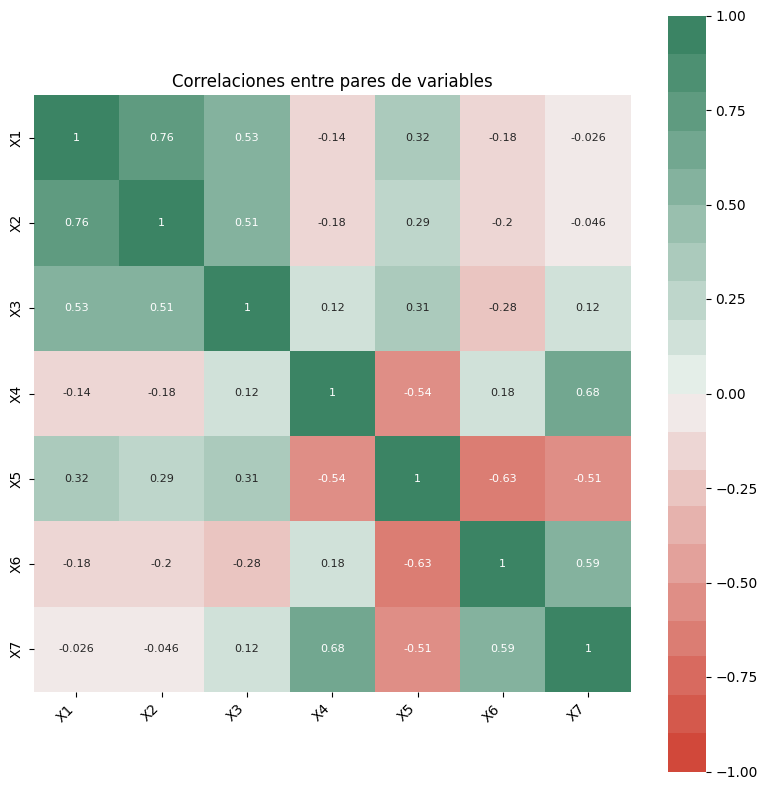

In [17]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(15, 150, n=20),
    square=True,
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)

ax.tick_params(labelsize=10)
ax.set_title("Correlaciones entre pares de variables")
plt.tight_layout()
plt.show()

In [18]:
tab_corr = Tabular_corr_matrix(corr_matrix)

selected_pairs = set()
final_pairs = []

for _, row in tab_corr.iterrows():
    var1, var2 = row.variable_1, row.variable_2
    
    # Evitar agregar el mismo par en orden inverso
    if (var1, var2) not in selected_pairs and (var2, var1) not in selected_pairs:
        selected_pairs.add((var1, var2))
        final_pairs.append((var1, var2, row.correlación))
    
    if len(final_pairs) == 4:
        break
print(selected_pairs)

{('X1', 'X2'), ('X7', 'X4'), ('X1', 'X3'), ('X7', 'X6')}


Vemos que las variables con mayor correlación son:
1. $(X1, X3)$
2. $(X1, X2)$
3. $(X7, X6)$
4. $(X7, X4)$

<b>C.</b> Plotee los cuatro pares de variables con mayor correlación, mostrando la recta de regresión lineal que mejor se ajusta a los datos.

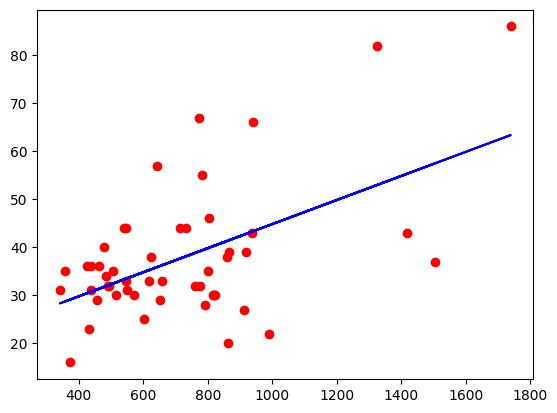

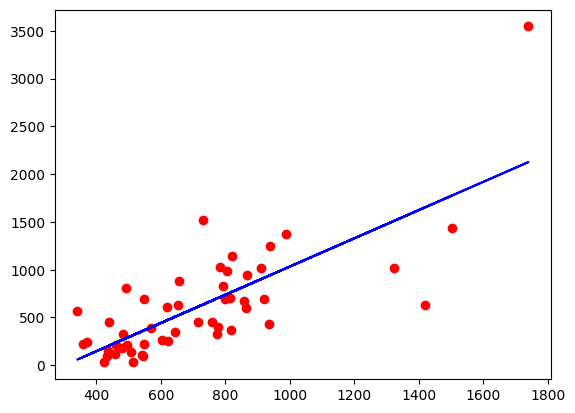

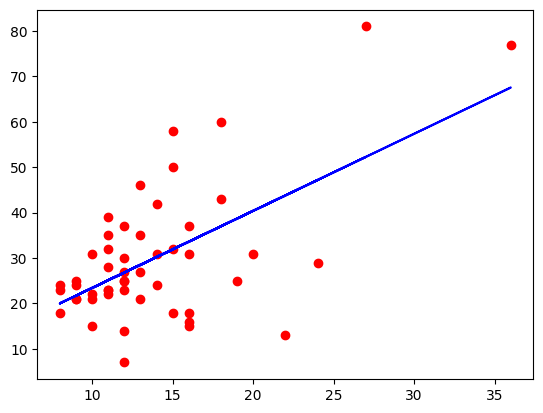

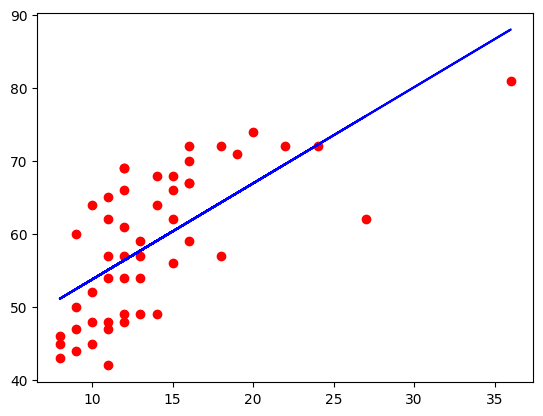

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def linear_regression(X, Y):
    a = np.inner(X,X)
    b = np.sum(X)
    c = np.inner(X,Y)
    d = np.sum(Y)
    N = len(X)
    Delta = a*N-b*b
    A =(N*c-b*d)/Delta
    B =(a*d-b*c)/Delta
    Y_pred = A*X+B
    plt.scatter(X, Y,color='red')
    plt.plot(X, Y_pred, color='blue')
    plt.show()

linear_regression(criminalidad['X1'], criminalidad['X3'])
linear_regression(criminalidad['X1'], criminalidad['X2'])
linear_regression(criminalidad['X7'], criminalidad['X6'])
linear_regression(criminalidad['X7'], criminalidad['X4'])

<b>D.</b> Haga un análisis multilineal tomando como variable dependiente los fondos anuales policiales por habitante, con las demás variables como variables predictorias. Indique la expresión que obtuvo.

Calcularemos los coeficientes de regresión $β_i$; $0 \leq i \leq 6$ tales que permitan predecir las ventas mediante una igualdad de la forma:

$$\text{X3}_{pred} = β_0  + β_1\text{X1} + β_2\text{X2} + β_3\text{X4} + β_4\text{X5} + β_5\text{X6} + β_6\text{X7}$$

In [20]:
X = pd.DataFrame(criminalidad[['X1','X2', 'X4', 'X5', 'X6', 'X7']]).values
Y = pd.DataFrame(criminalidad[['X3']]).values
#Generamos una columna de unos y la insertamos como primera columna de X
Unos = np.ones(len(criminalidad))
X = np.insert(X, 0, Unos, axis=1)
MPenrouse = np.linalg.pinv(np.matmul(X.transpose(),X)) # Cálculo de la seudo-inversa de More-Penrose
C = np.matmul(MPenrouse,X.transpose())
B = np.matmul(C,Y)
print(B)

[[-4.86463516]
 [ 0.01228691]
 [ 0.0057846 ]
 [ 0.27990054]
 [ 0.62677114]
 [-0.19446349]
 [ 0.71945018]]


Hemos obtenido la expresión

$$X3_{pred}=-4.864+0.012\cdot X1+0.005\cdot X2+0.279\cdot X4+0.626\cdot X5-0.194\cdot X6+0.719\cdot X7$$

<b>E.</b> Indique que variables predictorias tiene mayor impacto sobre la variable independinte. ¿Tiene sentido lo obtenido? Explique.

Solución:

Vemos de lo anterior que las variables tienen impacto en el siguiente orden de mayor a menor sobre la independiente:
1. <b>X7:</b> Porcentaje de la población de 25 o más años con por lo menos 4 años de estudios universitarios.
2. <b>X5:</b> Porcentaje de la población de 16 a 19 años sin bachillerato.
3. <b>X4:</b> Porcentaje de personas de 25 años o más con bachillerato.
4. <b>X6:</b> Porcentaje de la población entre 18 a 24 años que realiza estudios universitarios.
5. <b>X1:</b> Reporte total de criminalidad por millón de residentes.
6. <b>X2:</b> Tasa de crímenes violentos por 100.000 residentes.

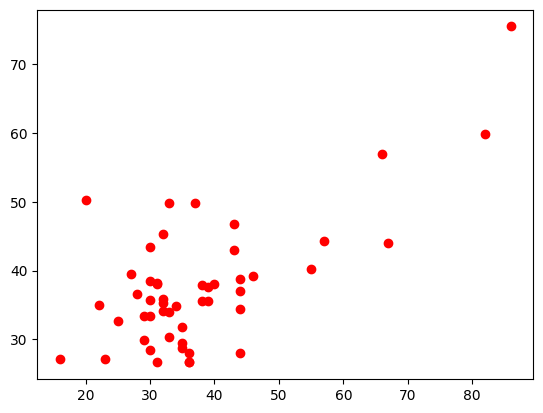

Coeficiente de correlación =  [[0.96829506]]


In [21]:
from numpy import linalg as LA
Y_pred = np.matmul(X,B)
plt.scatter(Y,Y_pred, color='red')
plt.show()
P_int=np.matmul(np.transpose(Y),Y_pred)
Norm_Y=LA.norm(Y)
Norm_Yp=LA.norm(Y_pred)
c = P_int/(Norm_Y*Norm_Yp)
print("Coeficiente de correlación = ",c)

<b>F.</b> Haga un análisis de regresión lineal simple entre la variable fondos anuales reales y los predichos por el modelo. Con base en este análisis evalúe el modelo.

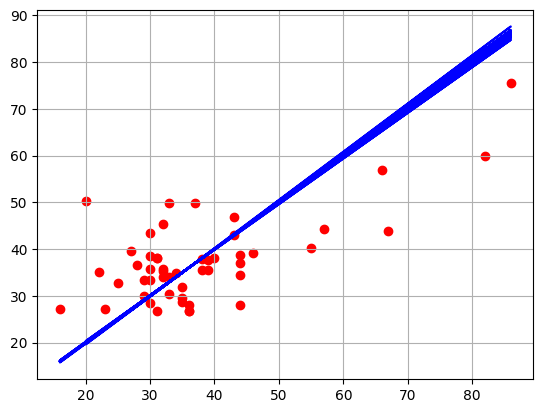

In [22]:
a = np.inner(Y_pred,Y_pred)
b = np.sum(Y_pred)
c = np.inner(Y_pred,Y)
d = np.sum(Y)
N = len(Y_pred)
Delta = a*N-b*b
A =(N*c-b*d)/Delta
B =(a*d-b*c)/Delta
Y_p = A*Y+B #Y_p es la Y predicha por el modelo de regresión simple
            #Y_pred es la Y predicha por el modelo de regresión múltiple
plt.grid(True)
plt.scatter(Y,Y_pred, color='red')
plt.plot(Y,Y_p, color='blue')
plt.show()

Podemos observar varias cosas, en primer lugar antes de hacer la regresión he sacado el coeficiente de correlación entre la variable predicha y la real; podemos observar que este dio bastante cercano a 1, indicando así que el modelo se ajusta bien a los datos. Esto en adición a que al hacer el análisis de regresión vemos como nuestra linea tiene una pendiente bastante cercana a 1.

<b>G.</b> Plantee un modelo de regresión multilineal que permita explicar los índices de criminalidad con el grado de escolaridad de la población. Explique brevemente su modelo y los resultados que obtiene de él.

<b>H.</b> ¿Es posible detectar datos atípicos en la base de datos con las herramientas vistas en clase?